# WeatherPy - Main

---

## Starter Code from UMN Data bootcamp
Editted by Ryan Cornelius

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'  #https://api.openweathermap.org/data/2.5/weather?     f'{url}q={city}&appid={api_key}&units={units}'
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units={units}'  #used metric units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()   # get city data in json

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']  # grab lat for current city
        city_lng = city_weather['coord']['lon']  # grab lon for current city
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] # e.g. 1683335425

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ha'il
Processing Record 2 of Set 1 | al-hamdaniya
Processing Record 3 of Set 1 | flying fish cove
Processing Record 4 of Set 1 | chak azam sahu
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | acapulco de juarez
Processing Record 7 of Set 1 | wotho
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | zubtsov
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | kalmunai
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | anloga
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | tostado
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_lat = city_weather['coord']['lat']  # grab lat for current city
city_lng = city_weather['coord']['lon']  # grab lon for current city
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt'] # e.g. 1683335425





city_data_df = pd.DataFrame(data = city_data) #city data dict appended to with data earlier

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  ...  Wind Speed  Country        Date
0             ha'il  27.5219   41.6907  ...        0.00       SA  1683335889
1      al-hamdaniya  36.2715   43.3737  ...        2.44       IQ  1683335889
2  flying fish cove -10.4217  105.6791  ...        3.09       CX  1683335717
3    chak azam sahu  30.7500   73.0333  ...        1.33       PK  1683335891
4          waitangi -43.9535 -176.5597  ...        3.58       NZ  1683335712

[5 rows x 9 columns]

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  ...  Wind Speed  Country        Date
City_ID                                       ...                                 
0                   ha'il  27.5219   41.6907  ...        0.00       SA  1683335889
1            al-hamdaniya  36.2715   43.3737  ...        2.44       IQ  1683335889
2        flying fish cove -10.4217  105.6791  ...        3.09       CX  1683335717
3          chak azam sahu  30.7500   73.0333  ...        1.33       PK  1683335891
4                waitangi -43.9535 -176.5597  ...        3.58       NZ  1683335712

[5 rows x 9 columns]

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

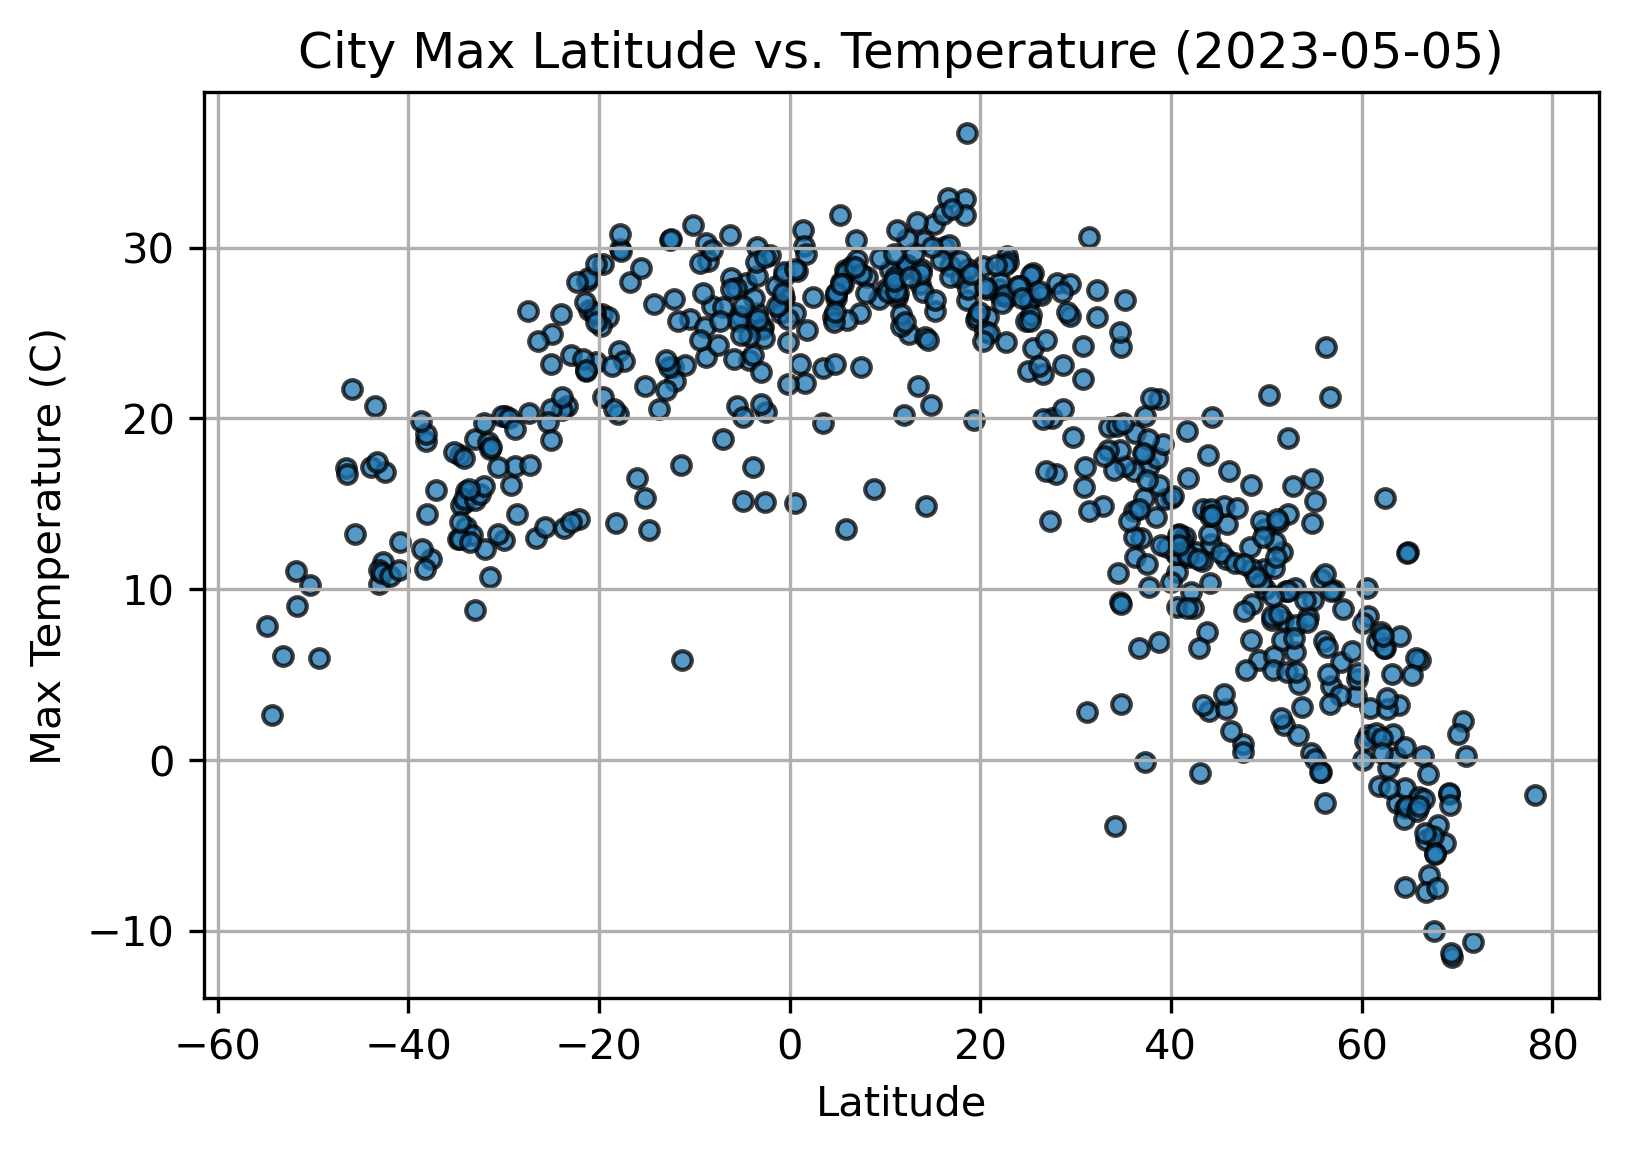

In [18]:
# Build scatter plot for latitude vs. temperature   <--- standard is "y vs. x" not "x vs. y"
fig = city_data_df.plot.scatter('Lat','Max Temp',edgecolors= "black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2023-05-05)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

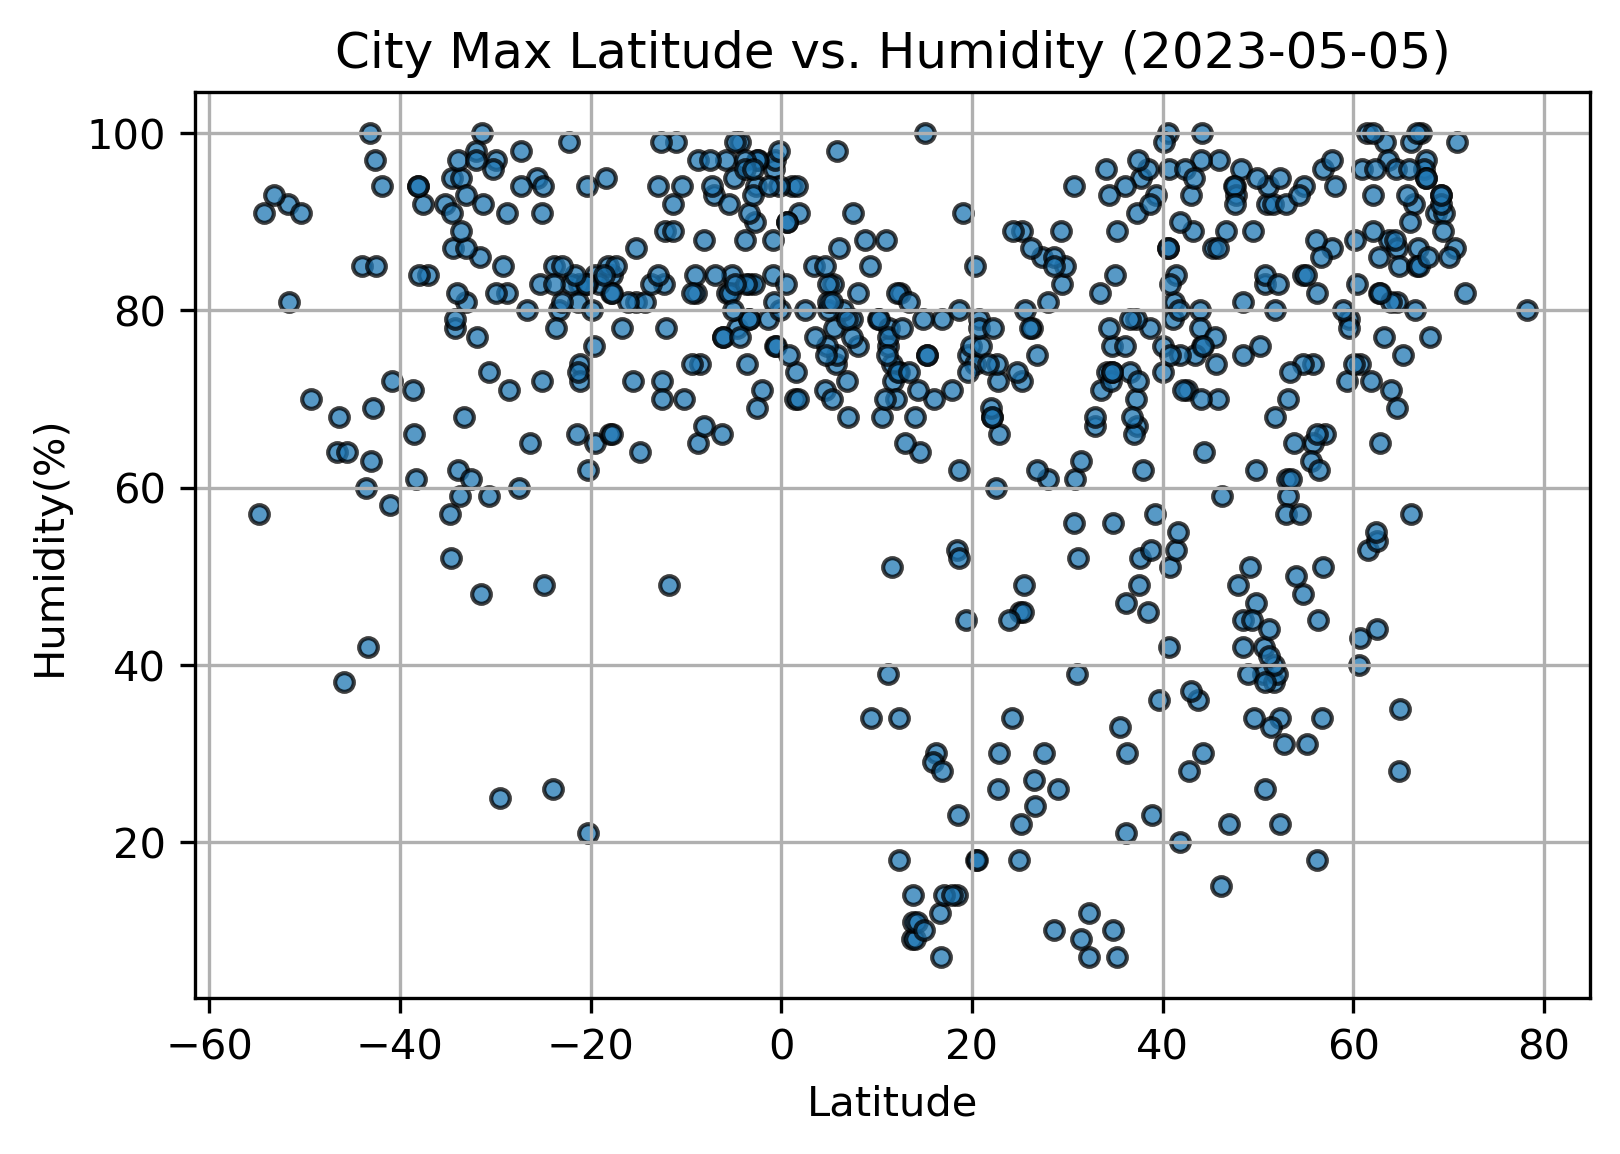

In [19]:
# Build the scatter plots for latitude vs. humidity
fig = city_data_df.plot.scatter('Lat','Humidity',edgecolors= "black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (2023-05-05)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

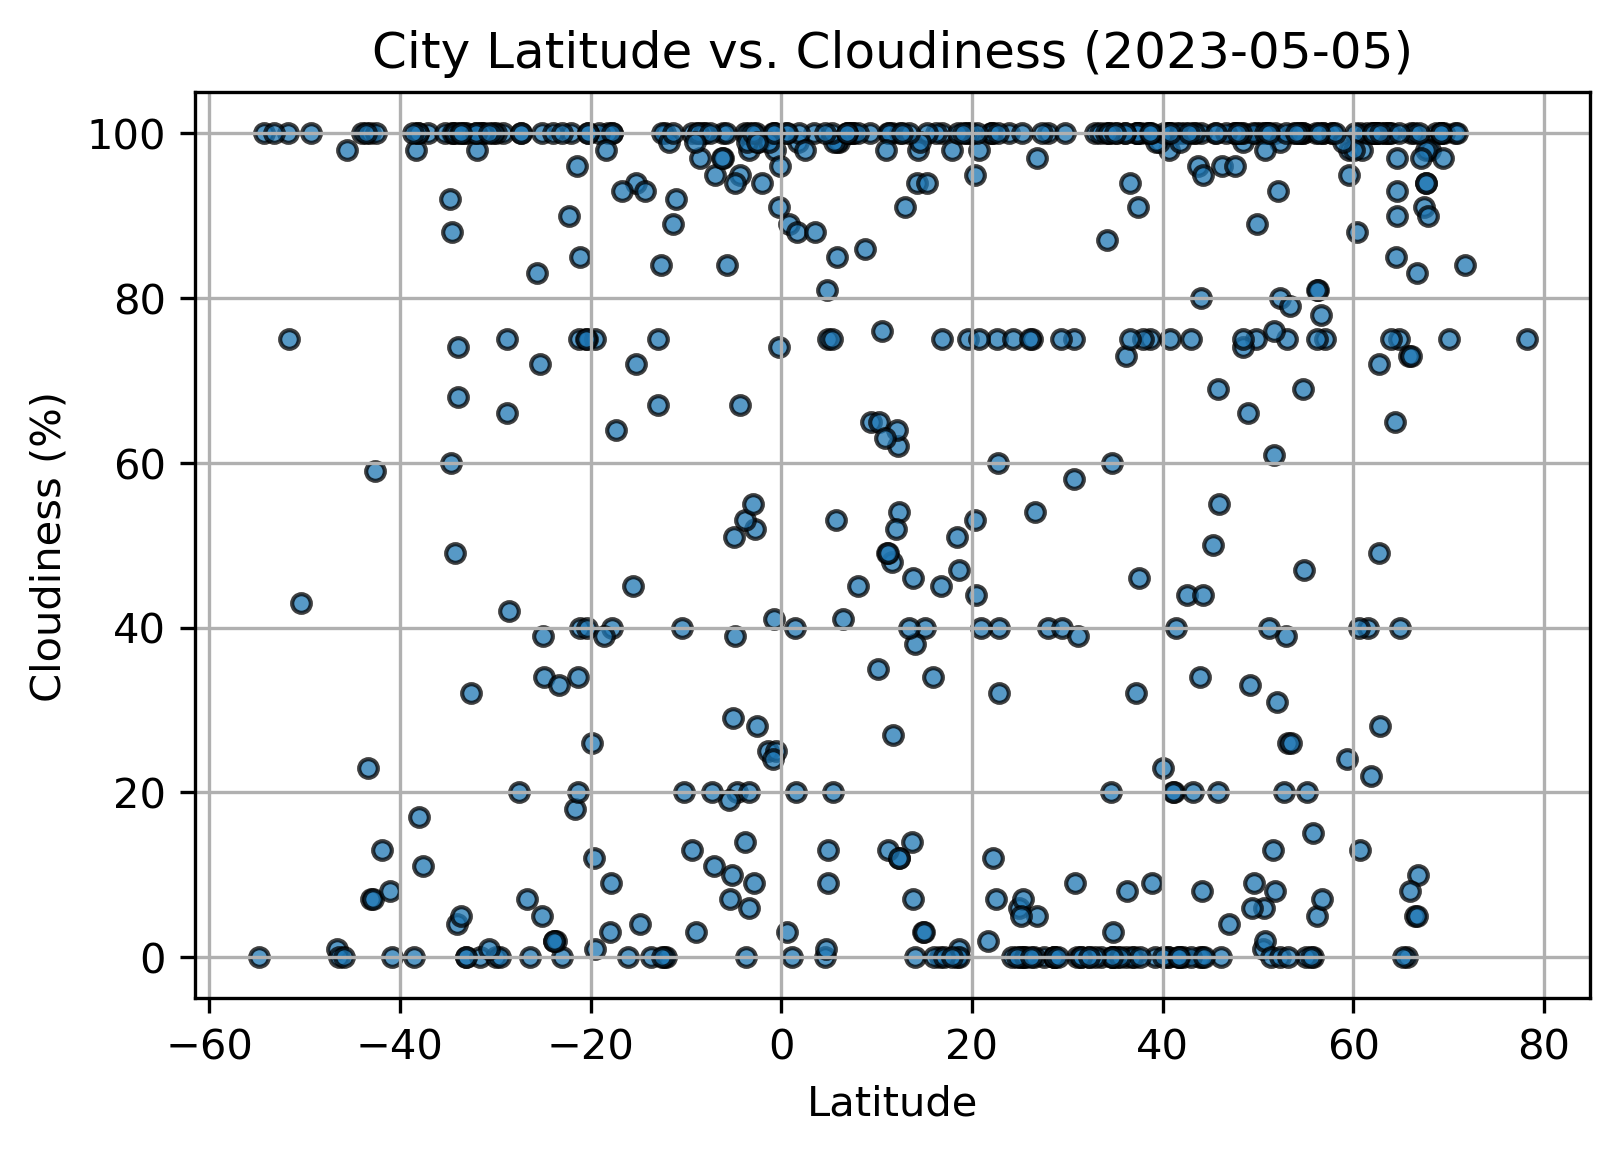

In [20]:
# Build the scatter plots for latitude vs. cloudiness
fig = city_data_df.plot.scatter('Lat','Cloudiness',edgecolors= "black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-05-05)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

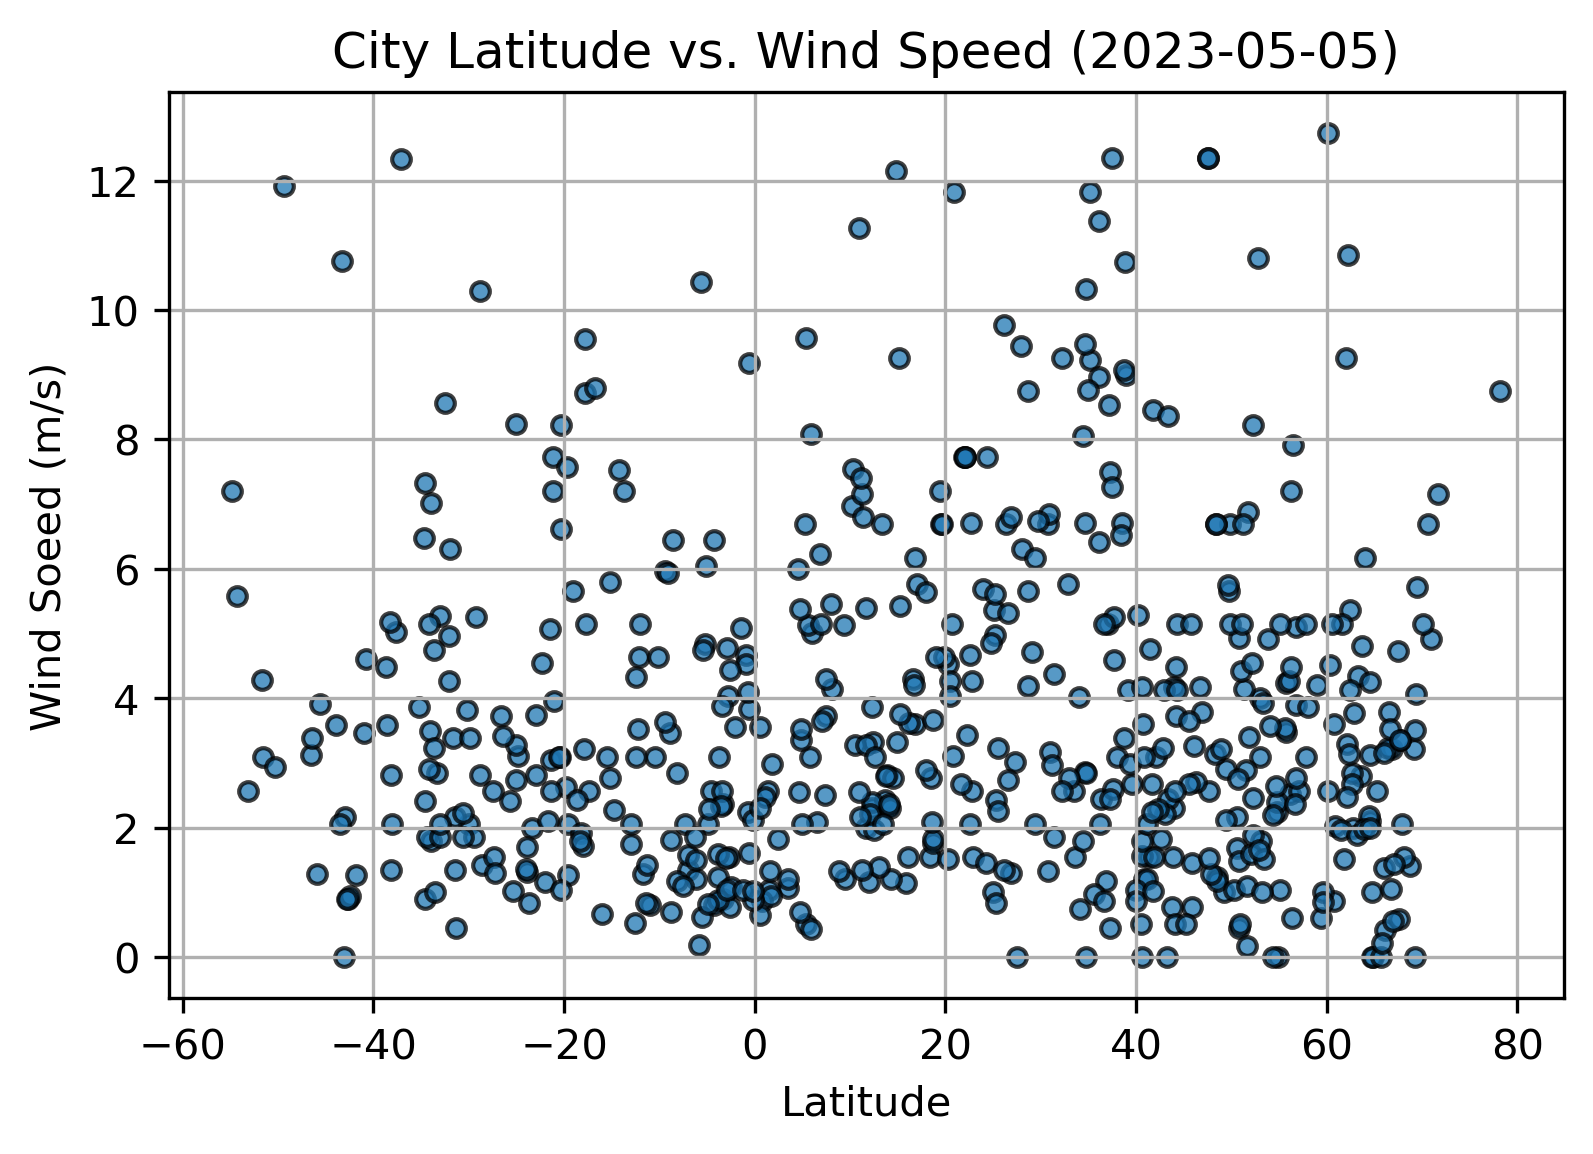

In [21]:
# Build the scatter plots for latitude vs. wind speed
fig = city_data_df.plot.scatter('Lat','Wind Speed',edgecolors= "black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Soeed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-05-05)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
import matplotlib.patheffects as PathEffects

def LinearFitPlot(x_in,y_in):
    
    (slope, intercept, r, p, std_err) = linregress(x_in,y_in)
    R2 = r*r
    fit_xdata = np.linspace(min(x_in),max(x_in),len(x_in))
    fit_ydata = slope * fit_xdata + intercept

    fig = plt.scatter(x_in,y_in,edgecolors= "black", alpha=0.75)
    plt.plot(fit_xdata,fit_ydata,'--r')
    txt = plt.text(
             np.mean(fit_xdata),
             min(y_in)*1.1,
             f'y={slope:.3f}x+{intercept:.3f}, R²={R2:.2f}',
             alpha = 0.75,
             color = 'r'
                )
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])

    return fig



In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  ...  Wind Speed  Country        Date
City_ID                                         ...                                 
0                     ha'il  27.5219   41.6907  ...        0.00       SA  1683335889
1              al-hamdaniya  36.2715   43.3737  ...        2.44       IQ  1683335889
3            chak azam sahu  30.7500   73.0333  ...        1.33       PK  1683335891
5        acapulco de juarez  16.8634  -99.8901  ...        3.60       MX  1683335746
6                     wotho  10.1657  166.0102  ...        6.97       MH  1683335892

[5 rows x 9 columns]

In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  ...  Wind Speed  Country        Date
City_ID                                       ...                                 
2        flying fish cove -10.4217  105.6791  ...        3.09       CX  1683335717
4                waitangi -43.9535 -176.5597  ...        3.58       NZ  1683335712
7               grytviken -54.2811  -36.5092  ...        5.58       GS  1683335698
11            east london -33.0153   27.9116  ...        5.27       ZA  1683335739
12                   lebu -37.6167  -73.6500  ...        5.03       CL  1683335738

[5 rows x 9 columns]

###  Temperature vs. Latitude Linear Regression Plot

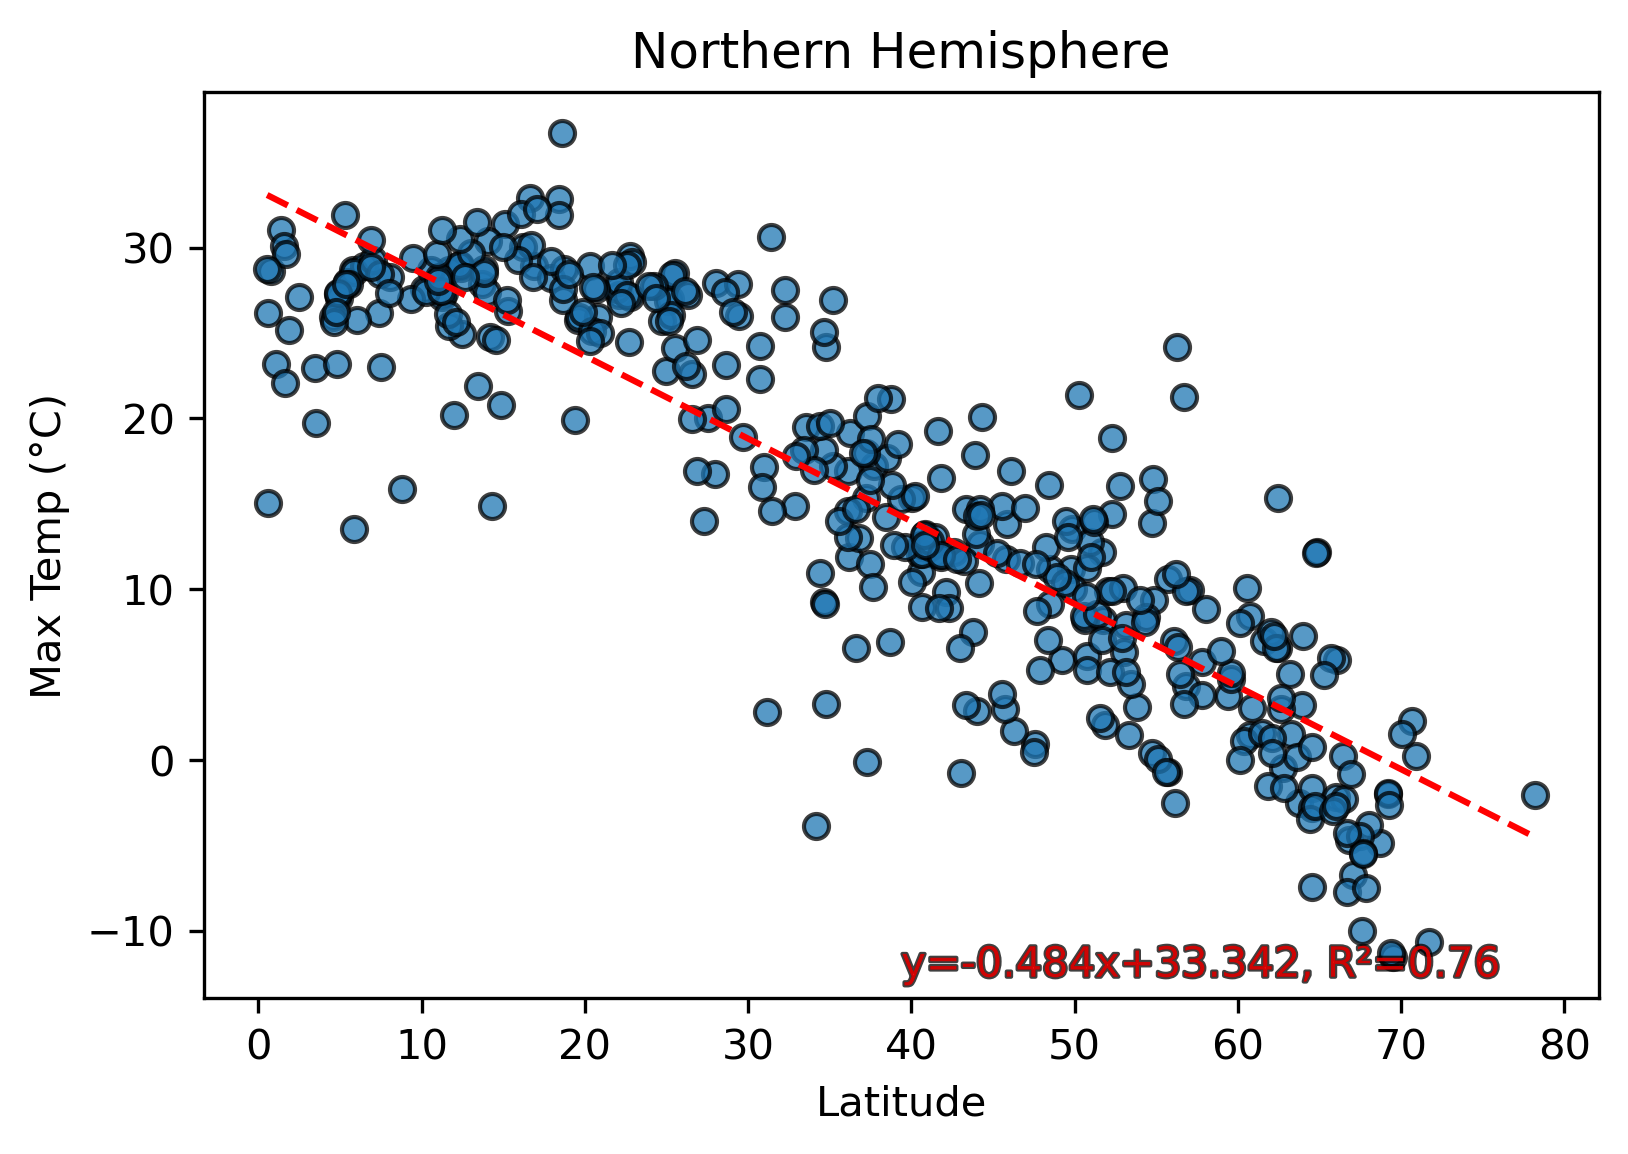

In [88]:
# Linear regression on Northern Hemisphere
fig = LinearFitPlot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°C)')
plt.title('Northern Hemisphere')

plt.show()

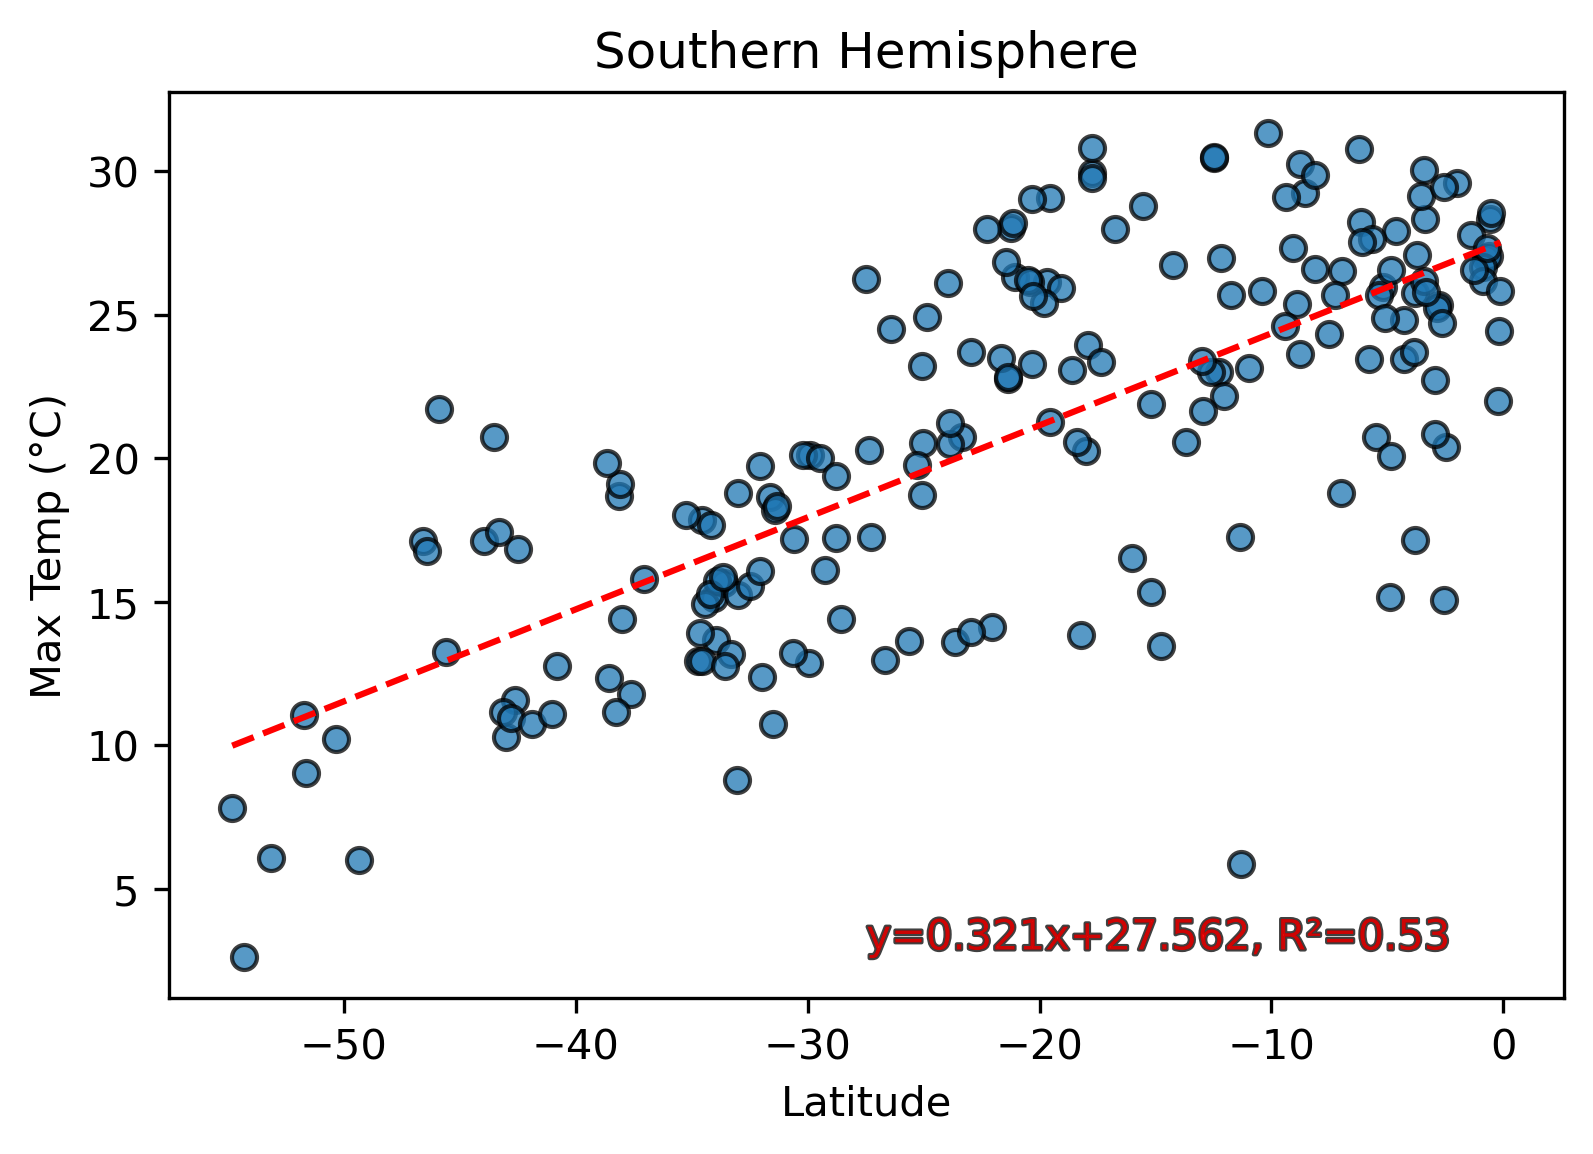

In [89]:
# Linear regression on Southern Hemisphere
fig = LinearFitPlot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°C)')
plt.title('Southern Hemisphere')

plt.show()

### Discussion about the linear relationship:

As can be seen in the provided figures, there is a linear relationship between the distance from the equator (latitude = 0) and the average maximum temperature of select cities. Correlation R² values of 0.76 and 0.53 for northern and southern hemispheres, respectively, point towards the strength of the correlation. It is interesting to note that based on the statistics available, average max temperature appears to decrease faster when going north from the equator. 


### Humidity vs. Latitude Linear Regression Plot

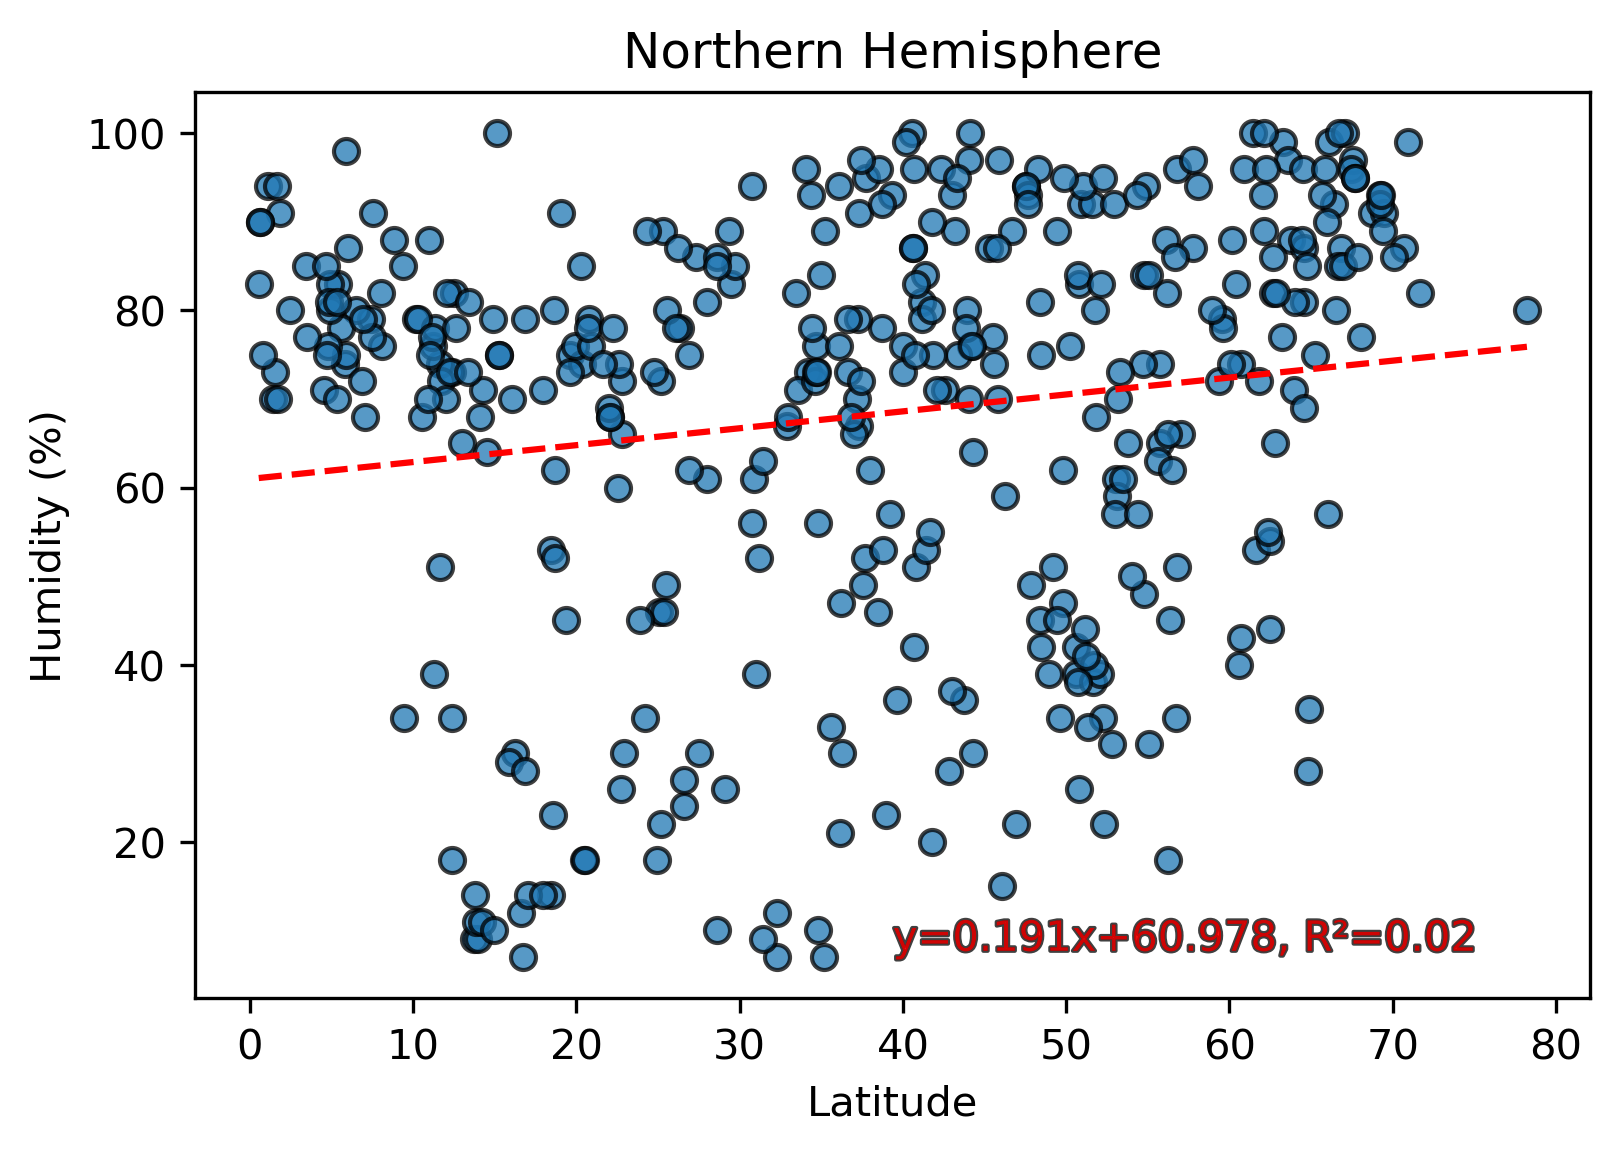

In [90]:
# Northern Hemisphere
fig = LinearFitPlot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere')

plt.show()

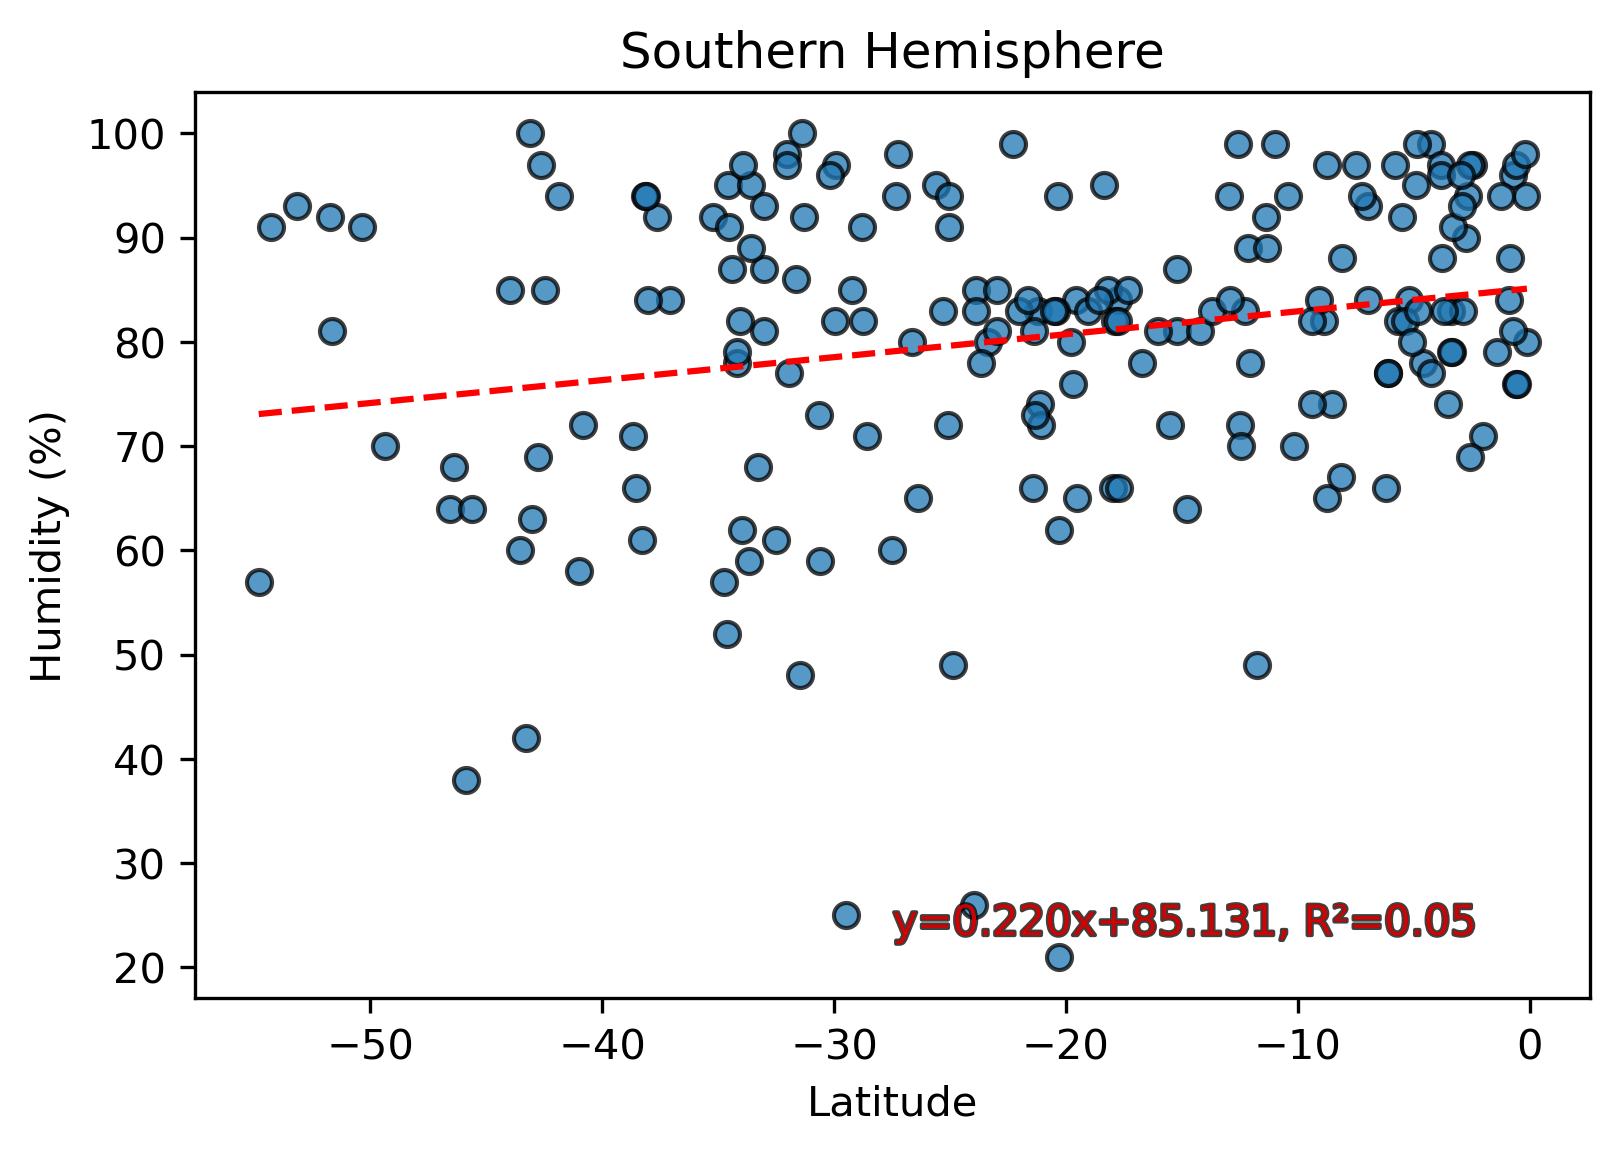

In [91]:
# Southern Hemisphere
fig = LinearFitPlot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere')

plt.show()

### Discussion about the linear relationship:

It appears that humidity, on average, is higher in the southern hemisphere compared to the norther hemisphere. No conclusion can be drawn relating humidity to the equator, R² values of 0.02 and 0.05 mean there is poor correlation between latitude and relative humidity.

### Cloudiness vs. Latitude Linear Regression Plot

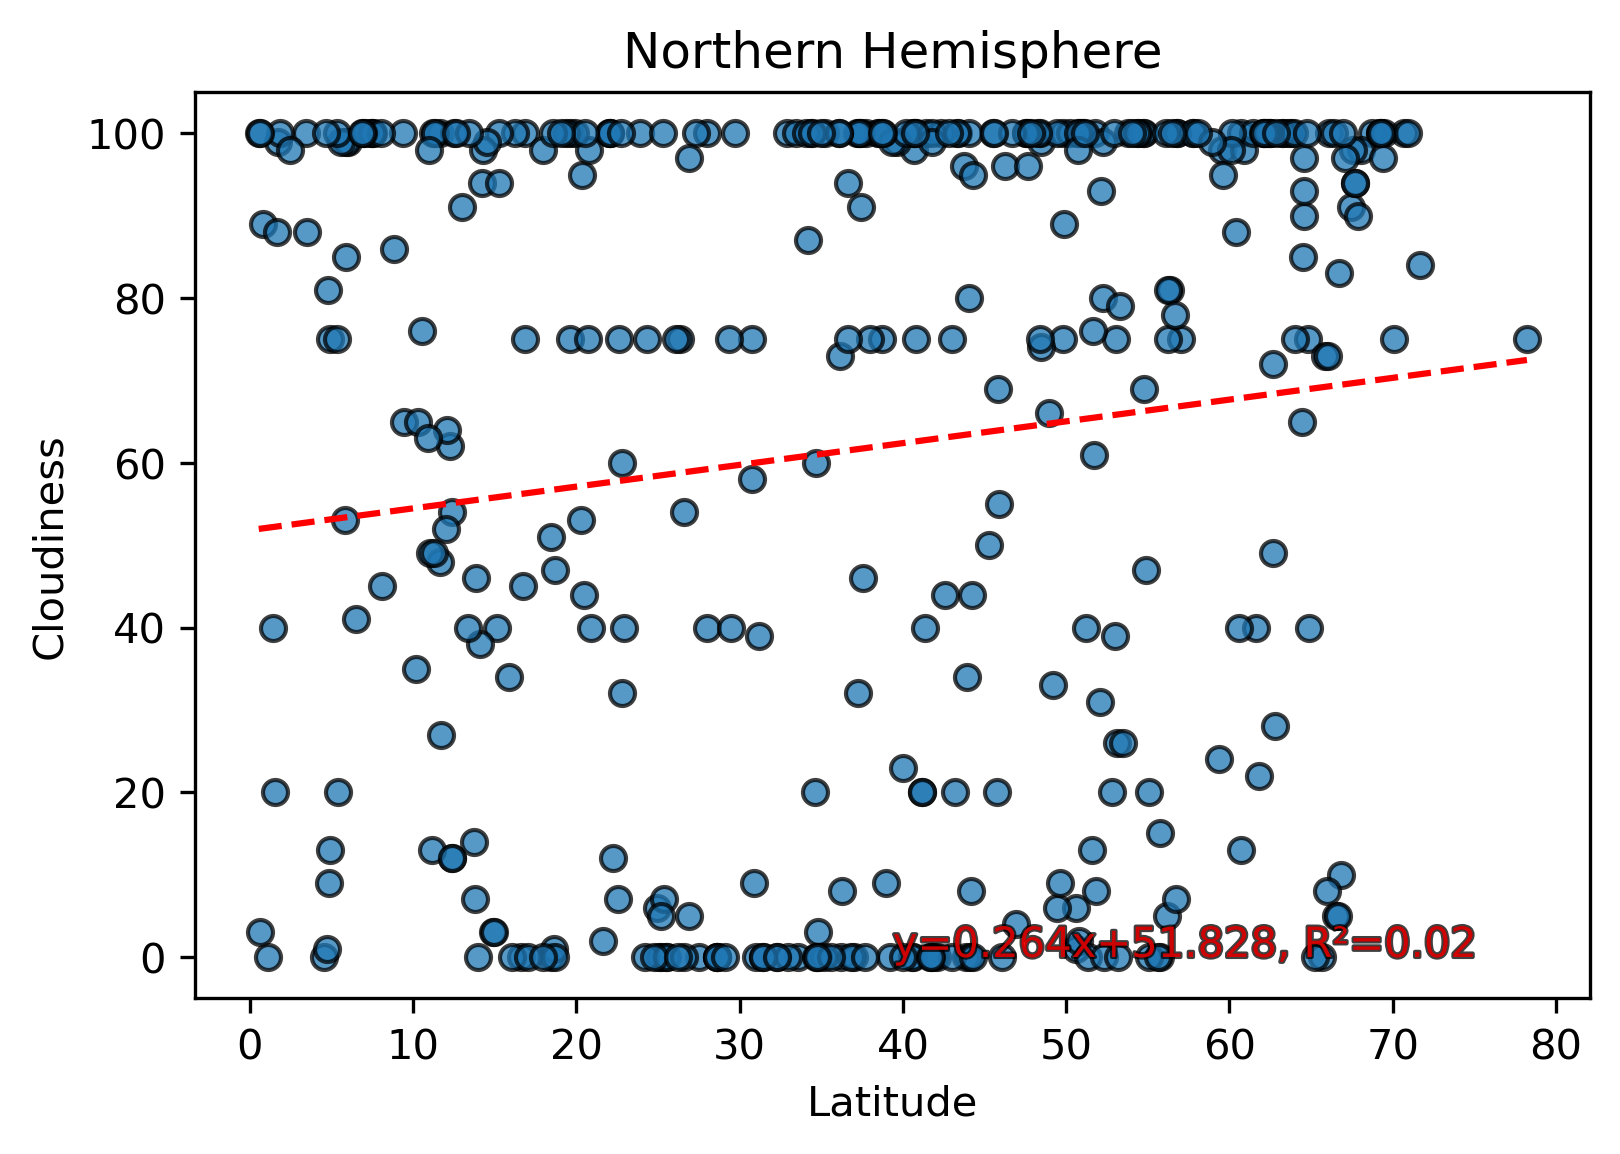

In [92]:
# Northern Hemisphere
fig = LinearFitPlot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere')

plt.show()

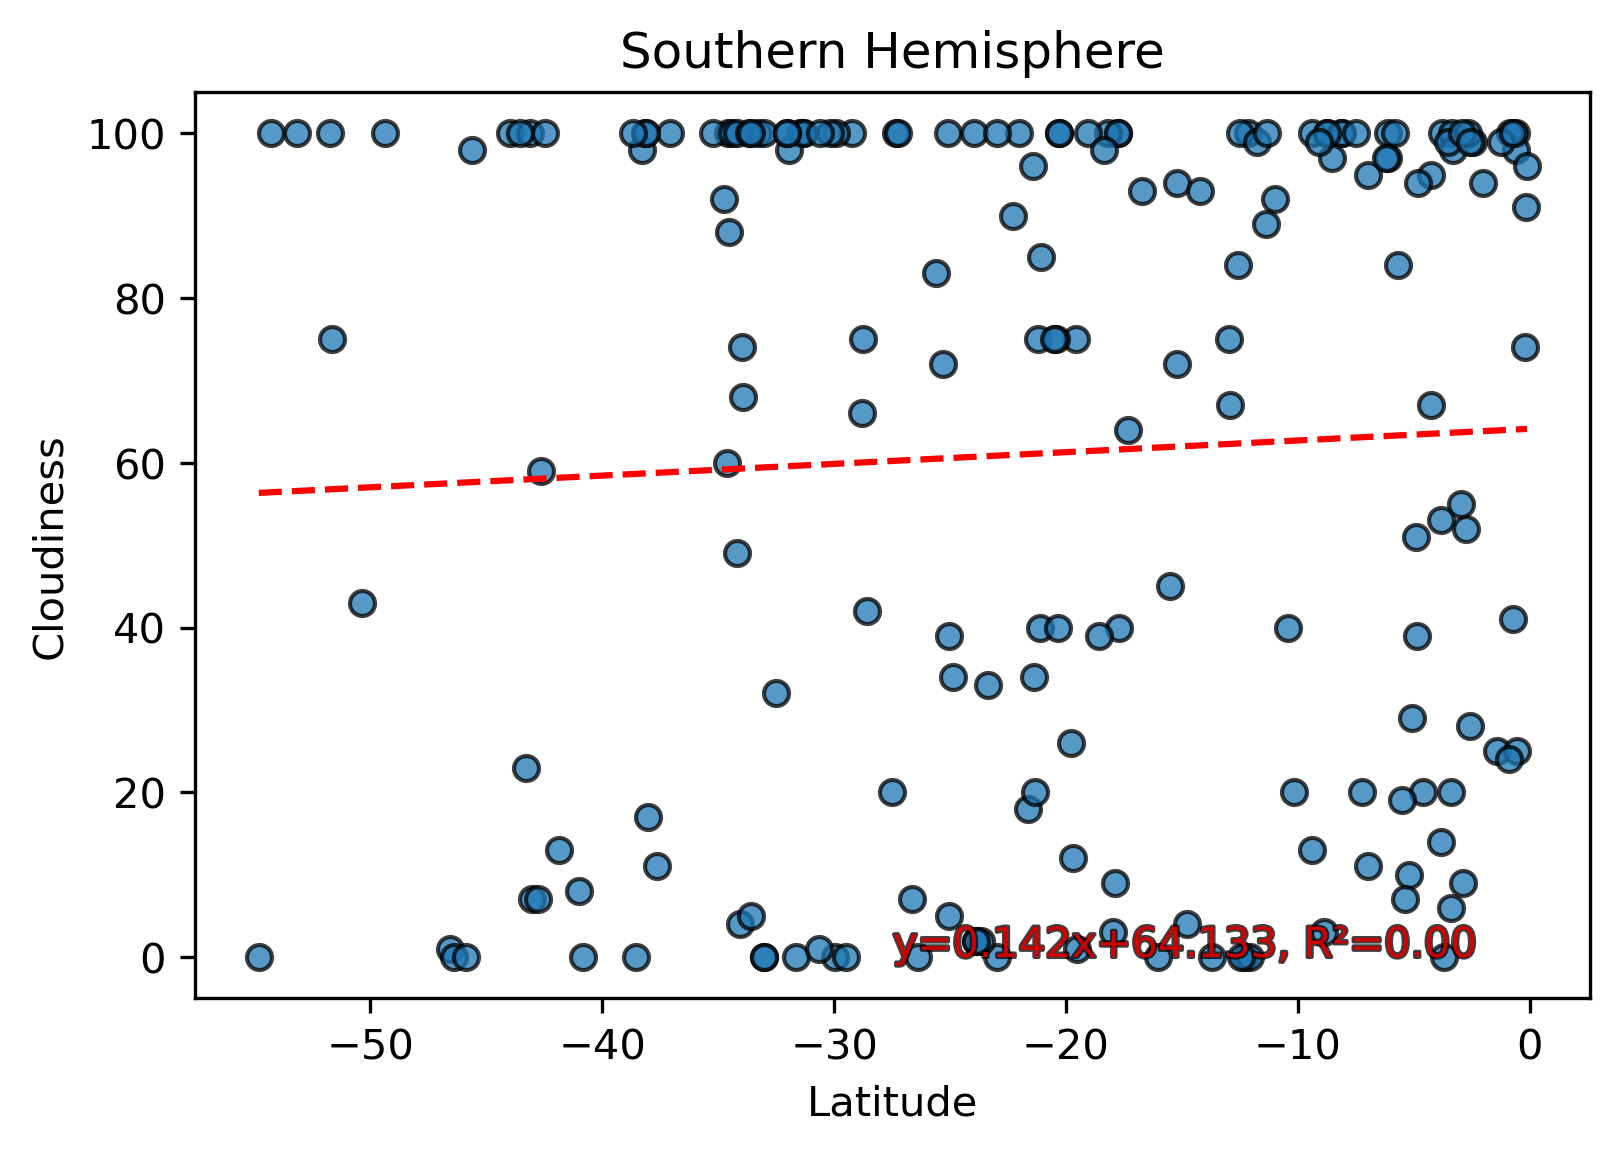

In [93]:
# Southern Hemisphere
fig = LinearFitPlot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere')

plt.show()

### Discussion about the linear relationship:

It appears that cloudiness does not adequately correlate to latitude. R² values of 0.02 and 0.00 are once again great signifiers of lacking correlation strength. 

### Wind Speed vs. Latitude Linear Regression Plot

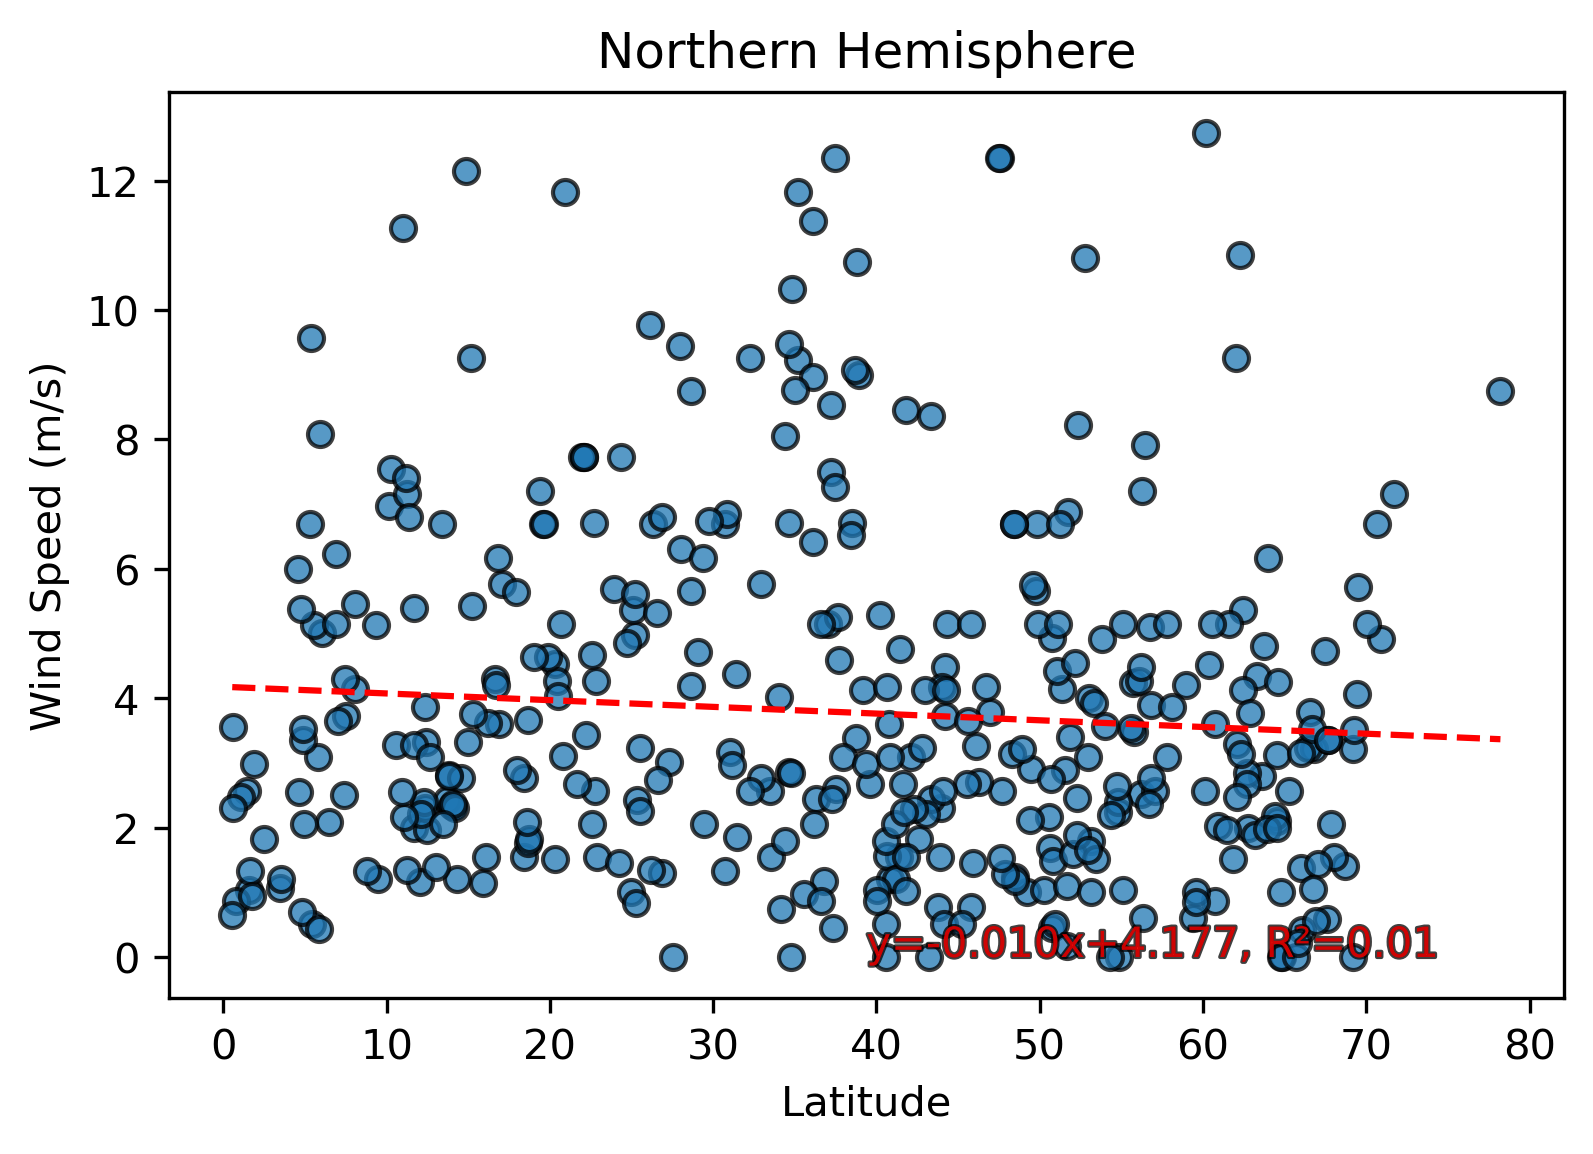

In [94]:
# Northern Hemisphere
fig = LinearFitPlot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere')

plt.show()

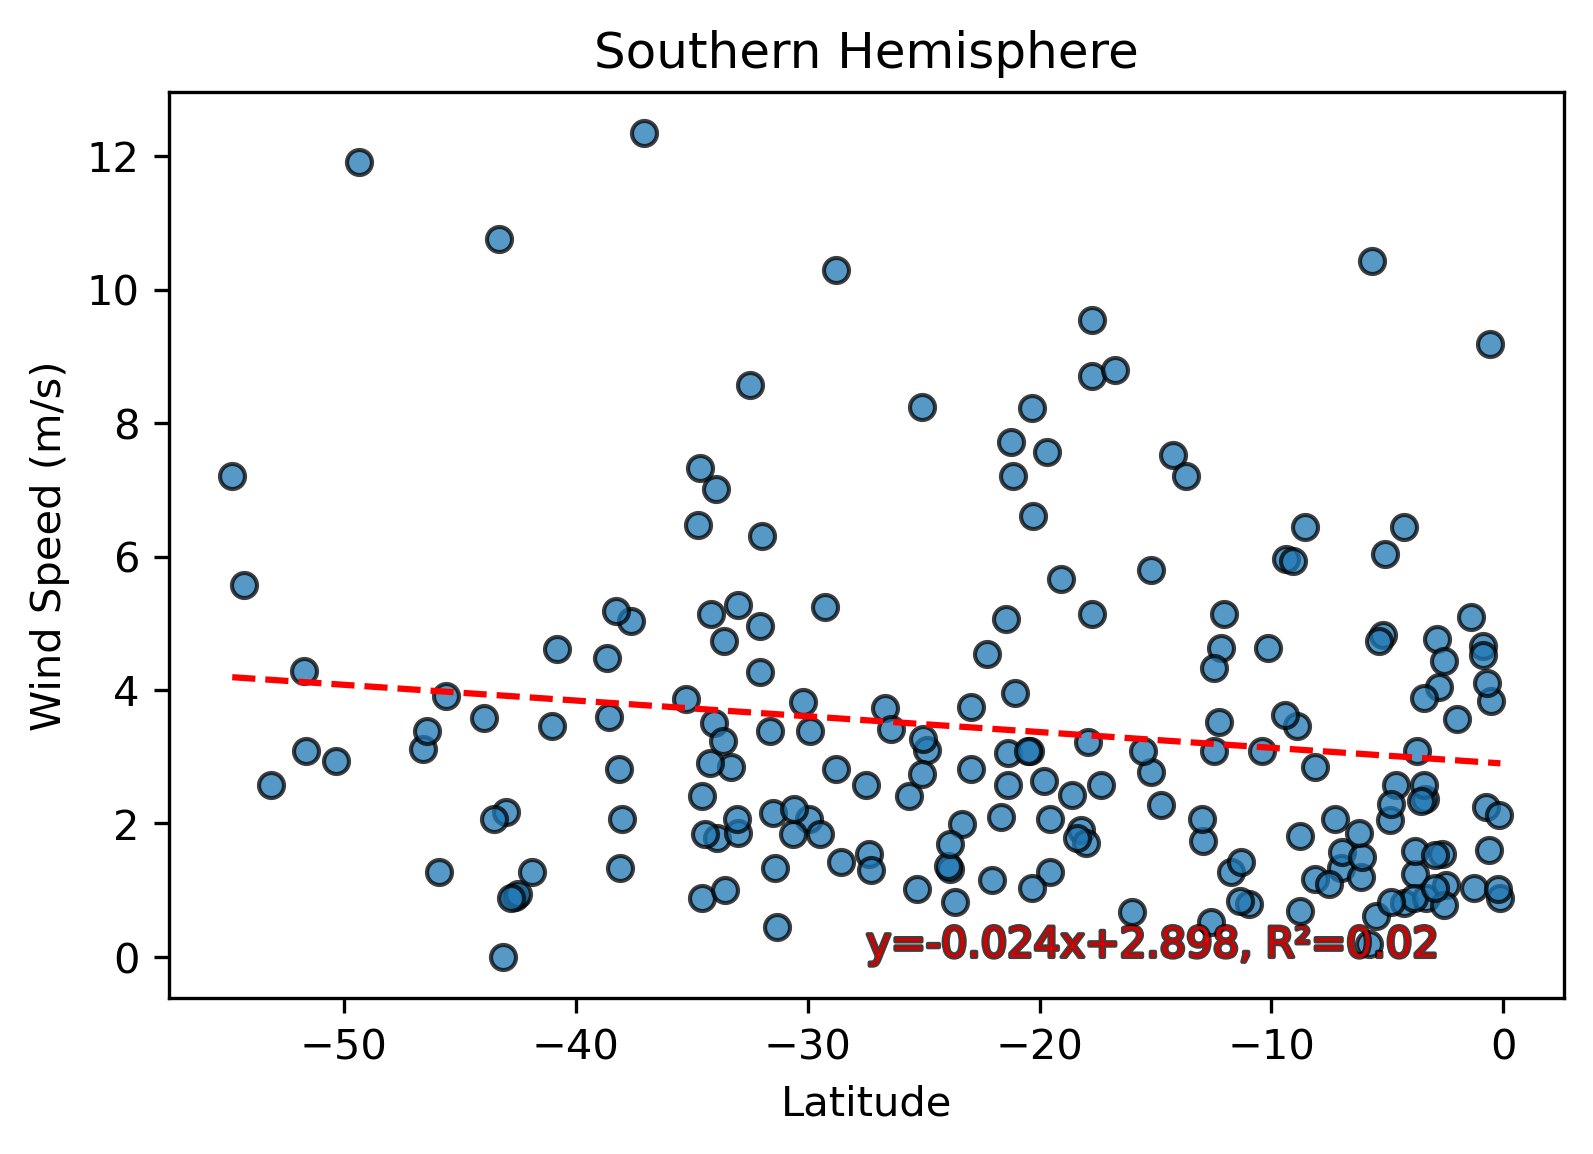

In [97]:
# Southern Hemisphere
fig = LinearFitPlot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere')

plt.show()

### Discussion about the linear relationship:

Again, it appears that wind speed does not adequately correlate to latitude. R² values of 0.01 and 0.02 are once again great signifiers of lacking correlation strength. 